# Diabetes Classification Notebook
In this notebook, we'll go through the process of loading a diabetes dataset, preprocessing the data, and training a k-Nearest Neighbors (k-NN) classifier to predict whether or not an individual has diabetes. We will also evaluate the model and visualize the performance of the model based on different hyperparameters.


In [39]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


## Data Loading and Preprocessing
First, we load our dataset from an Excel file and split our data into features (X) and target labels (y). We then split these into training and test sets. For the features, we apply a MinMaxScaler to scale our data to a fixed range between 0 and 1. For our target labels, we use LabelEncoder to encode target labels with value between 0 and n_classes-1.


In [40]:
# Load and preprocess data
df = pd.read_excel("diabetes_excel.xlsx")
dfX = df.drop(columns=['Outcome'])
sy = df['Outcome']

# Split data into training and test sets
dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, test_size=0.2, random_state=42)

# Preprocess labels
le = preprocessing.LabelEncoder()
le.fit(sy_train)
y_train = le.transform(sy_train)
y_test = le.transform(sy_test)

# Preprocess features
scaler = preprocessing.MinMaxScaler()
scaler.fit(dfX_train)
X_train = scaler.transform(dfX_train)
X_test = scaler.transform(dfX_test)


## Model Training
We're using the k-Nearest Neighbors (k-NN) algorithm for our classification task. We'll try different values of k (number of neighbors) and observe how the choice of k affects our model's accuracy.


In [41]:
# Model training and finding the best k
k_values = range(1, 50)
train_scores, test_scores = [], []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# Identify the best k value
best_k = k_values[np.argmax(test_scores)]


## Model Evaluation
We will visualize the accuracy of the model on both the training and test sets across different k values. This will help us understand if the model is overfitting (if it performs significantly better on the training set) or underfitting (if it performs poorly on both sets).


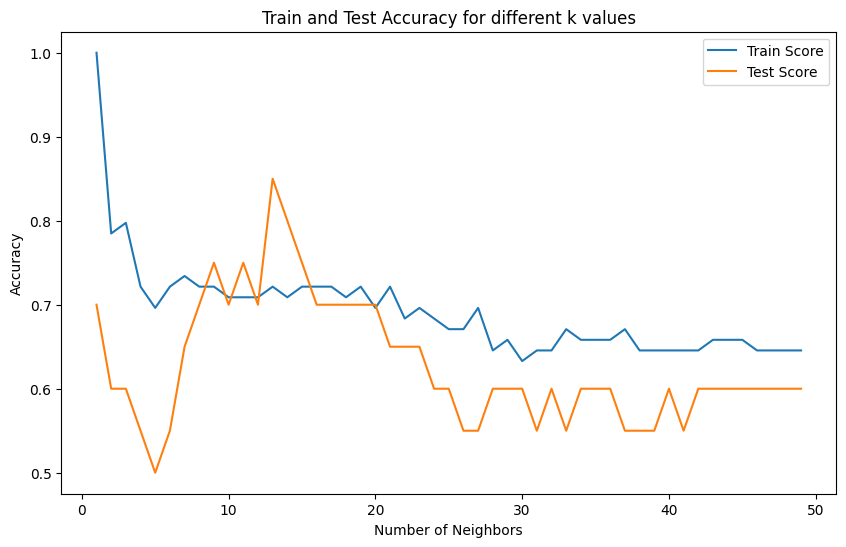

In [42]:
# Plotting the accuracy for different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Score')
plt.plot(k_values, test_scores, label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train and Test Accuracy for different k values')
plt.show()


## Confusion Matrix
We will use a confusion matrix to visualize the performance of our classifier with the best k value. This matrix will show us the true positive, true negative, false positive, and false negative values.


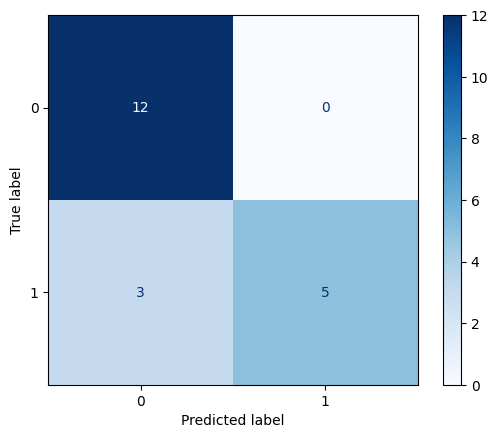

In [43]:
# Confusion Matrix
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
display.plot(cmap=plt.cm.Blues)
plt.show()


## Single Prediction
For a new patient's data, we can use our trained model to predict whether the patient has diabetes. It's crucial to apply the same preprocessing to this new data as we did for the training data.


In [44]:
# Create a new instance with the same feature names as the training set
new_instance = pd.DataFrame([[5, 84, 61, 15, 0, 22.2, 0.458, 46]], columns=dfX_train.columns)
new_instance_scaled = scaler.transform(new_instance)

# Predict the class for the new instance
predicted = best_knn.predict(new_instance_scaled)
print("Predicted class for the new instance:", le.inverse_transform(predicted))


Predicted class for the new instance: [0]


c:\mycode\coding\cure\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Conclusion
In this notebook, we've gone through the complete process of training a k-Nearest Neighbors classifier to predict diabetes. We've preprocessed our data, trained our model using different hyperparameters, evaluated it using accuracy and a confusion matrix, and made a prediction on new data. The choice of k significantly affects the model's performance, and it's essential to choose a value that prevents overfitting while maintaining good performance on unseen data.
